# Project: Investigate the No-show appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

# Dataset Description :
---
We are working today on a medical dataset collected from 100k medical appointments in Brazil and it focused on on the question of whether or not patients show up for their appointment .
 A number of characteristics about the patient are included in each row* :
 
*Gender* : ( male/ female )  .

*ScheduledDay* : ( show us on what day the patient set up their appointment ) .

*Neighborhood* : ( indicates the location of the hospital ) .

*age* : ( how old the patient is ) .

*Scholarship* : ( indicates the patient is enrolled in Brasilian welfare program or not ) .


### Questions for Analysis :

* Is SMS had any impact on paitents who showed up ?
* which ages who showed up the most and which one is the least ?
* Does having a chronic diseases affected on showing up less or more ?
* is there a relationship between been an alcoholic and showing up at the appointments ?
* Does the scholarship increase the showing up ?
* which hospital has a highest amount of paitents and showed up ?

 

In [54]:
#importing some libirares .
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties


In [55]:
#load the Database and get some lines for looking.
df_No_show = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [56]:
#Inspecting the DataFrame and Identifing the Inconsistent Data
df_No_show.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [57]:
#get a review on the Data and search for missing values
df_No_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [58]:
#searching for outliers and overview.
df_No_show.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


*we almost have no outliers* 

*min for age is -1 and this is impossible so we have to drop it*

In [59]:
#searching for duplicates
df_No_show.duplicated().sum()

0

*data have no dublicates*

In [60]:
#check for the missing
df_No_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*we have no missing data*

In [61]:
# checking for the number of columns and rows
df_No_show.shape

(110527, 14)

*the Dataset have 110527 columns and 14 Rows*

In [62]:
# cheking for the types
df_No_show.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [63]:
# exploring the unique values
df_No_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

*Handcap has a unique values*


### *Data Cleaning*
---

 

In [64]:
#the wrong age 
x = df_No_show.query('Age== "-1"')
x

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [65]:
df_No_show.rename(columns= lambda x: x.lower(), inplace= True)
df_No_show.sample()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
96499,5.762889e+13,5667329,F,2016-05-06T07:39:42Z,2016-06-03T00:00:00Z,65,JARDIM DA PENHA,0,1,0,0,0,1,No


In [66]:
# drop it
df_No_show.drop(index= 99832 ,inplace=True)
df_No_show.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [67]:
# correlation for some columns names
df_No_show.rename(columns={'no-show': 'no_show','hipertension':'hypertension' , 'appointmentid': 'appointment_ID'}, inplace=True)
df_No_show.head()

,patientid,appointment_ID,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [68]:
#dropping for unnecessary columns to get a better vision . 
df_No_show.drop(columns=['appointment_ID','patientid','scheduledday','appointmentday'],inplace=True)
df_No_show.head(3)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
---

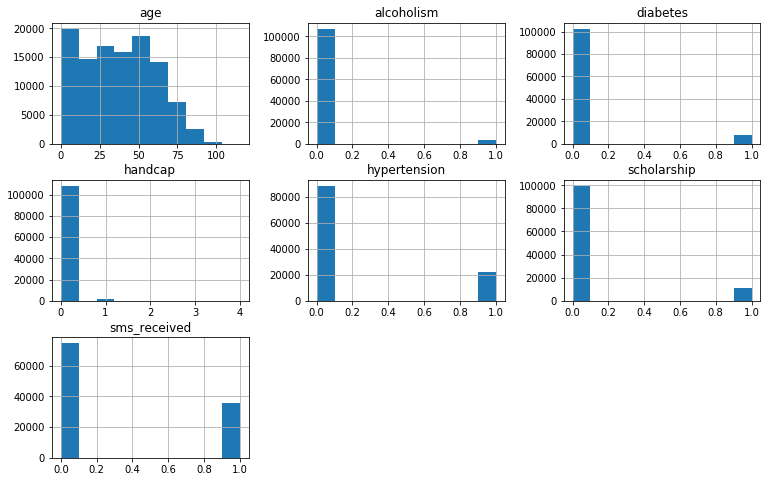

In [69]:
# now we going to look at the coulomns as a histogram and see what we get.
df_No_show.hist(figsize= (12.7 , 8));

- i can tell that most patients don't have disease
-  most of the patients didn't have alchohlism
- there is no much patients who get the scholarship
- most patients under 60 age is more that ages above


In [70]:
# to make it easy to visualize we make a new name
# for the groups No_show and use it in ploting
showed = df_No_show.no_show == "No"
not_showed = df_No_show.no_show == "Yes"

In [71]:
#let's take a look at the showed
print(df_No_show[showed].count())

gender           88207
age              88207
neighbourhood    88207
scholarship      88207
hypertension     88207
diabetes         88207
alcoholism       88207
handcap          88207
sms_received     88207
no_show          88207
dtype: int64


In [72]:
showed.shape

(110526,)

it has a 110526 column

In [73]:
not_showed.shape

(110526,)

it has a 110526 column

## Q1/ Is SMS had any impact on paitents who showed up ?

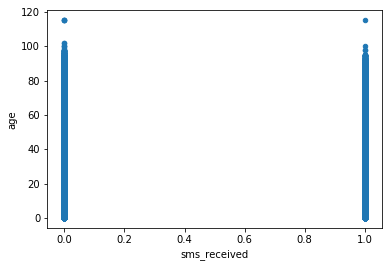

In [74]:
#let's ploting as scatter 
df_No_show.plot.scatter(x='sms_received',y='age');

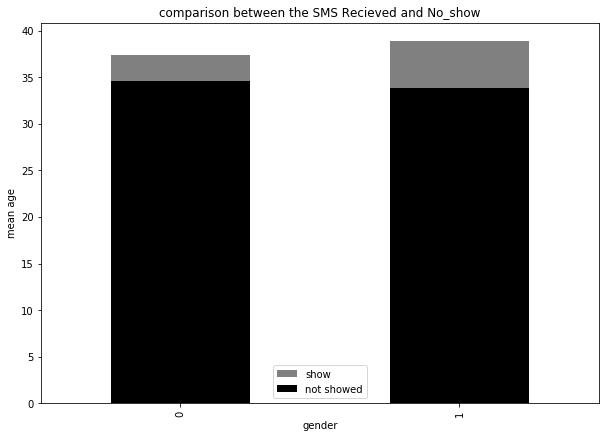

In [75]:
#ploting with bars
plt.figure(figsize=[10,7])
df_No_show[showed].groupby("sms_received").age.mean().plot(kind = 'bar' , color = "grey",label = "show")
df_No_show[not_showed].groupby("sms_received").age.mean().plot(kind = 'bar' , color = "black",label = "not showed")
plt.title('comparison between the SMS Recieved and No_show')
plt.xlabel('gender') 
plt.ylabel('mean age')
plt.legend();



 * there is no  clear relationship between the mean age of the patients who recived sms and showed and those who didn't showed

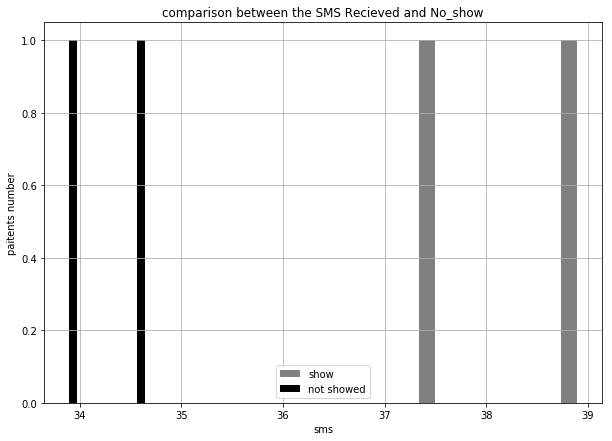

In [76]:
plt.figure(figsize=[10,7])
df_No_show[showed].groupby("sms_received").age.mean().hist( color = "grey",label = "show")
df_No_show[not_showed].groupby("sms_received").age.mean().hist( color = "black",label = "not showed")
plt.title('comparison between the SMS Recieved and No_show')
plt.xlabel('sms') 
plt.ylabel('paitents number')
plt.legend();

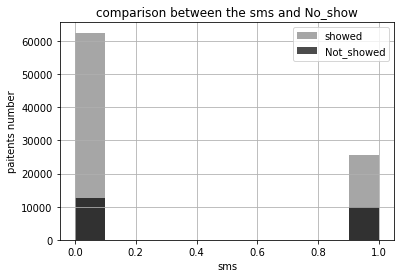

In [25]:
# to answer this question we have to plot the age column and No_show 
# and see what we get there
df_No_show.sms_received[showed].hist(alpha = 0.7 , bins = 10 ,color = 'gray',label = 'showed'  ) 
df_No_show.sms_received[not_showed].hist(alpha = 0.7 , bins = 10 ,color = "k" , label = 'Not_showed' )
plt.title('comparison between the sms and No_show') 
plt.xlabel('sms') 
plt.ylabel('paitents number') 
plt.legend(); 

* we can tell that paitents who didn't recive sms showed more than who didn't

## Q2 / which ages who showed up the most and which one is the least ?

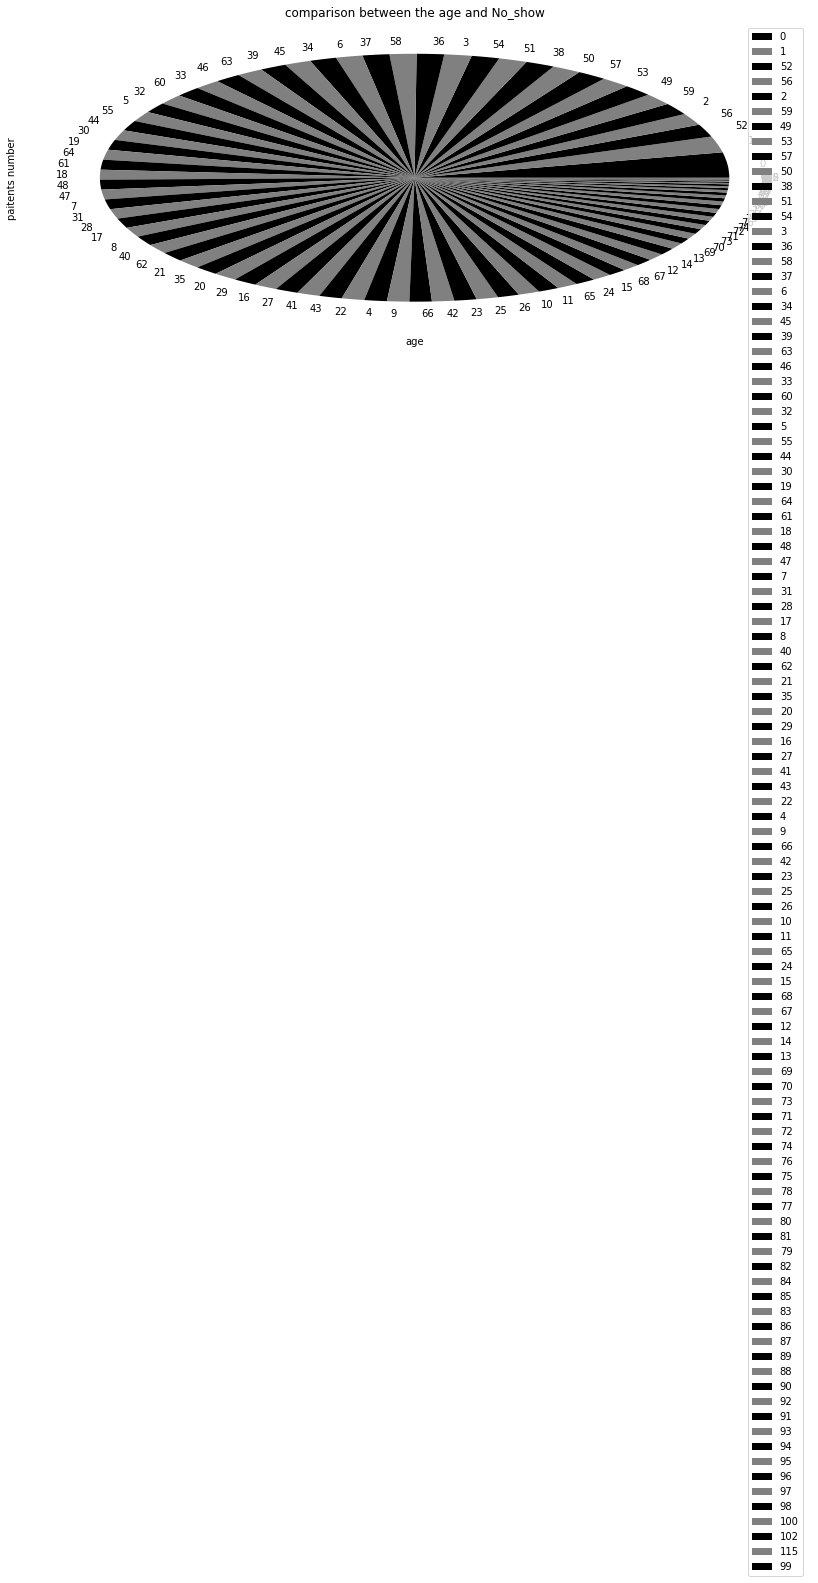

In [26]:
# to answer this question we have to plot the age column and No_show 
# and see what we get there
plt.figure(figsize=[14.1 , 5.7]) 
df_No_show.age[showed].value_counts().plot(kind = 'pie', colors= ["black", "grey"] , label = 'showed'  )
plt.title('comparison between the age and No_show') 
plt.xlabel('age') 
plt.ylabel('paitents number') 
plt.legend(); 

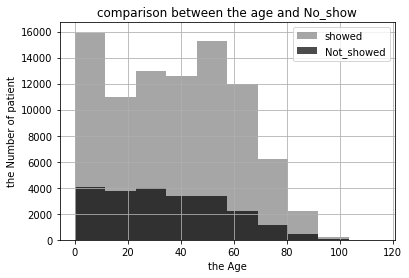

In [28]:
# to answer this question we have to plot the age column and No_show 
# and see what we get there
df_No_show.age[showed].hist(alpha = 0.7 , bins = 10 ,color = 'gray',label = 'showed'  ) 
df_No_show.age[not_showed].hist(alpha = 0.7 , bins = 10 ,color = "k" , label = 'Not_showed' )
plt.title('comparison between the age and No_show') 
plt.xlabel('the Age') 
plt.ylabel('the Number of patient') 
plt.legend(); 

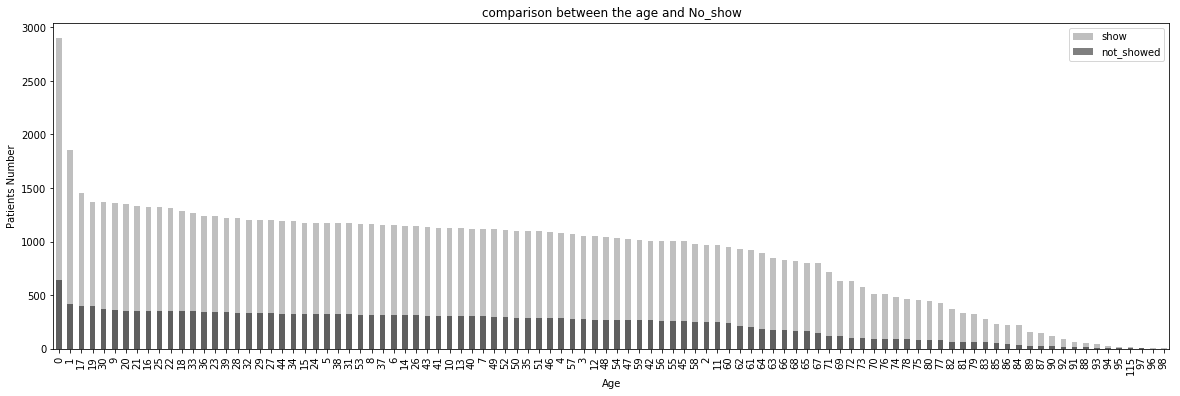

In [53]:
plt.figure(figsize=(20,6))
df_No_show.age[showed].value_counts().plot(kind='bar', alpha=0.5, color='grey', label='show')
df_No_show.age[not_showed].value_counts().plot(kind='bar', alpha=0.5, color='black', label='not_showed')
plt.title('comparison between the age and No_show')
plt.xlabel('Age')
plt.ylabel('Patients Number')
plt.legend();

 * we could say that the age from 0 to 10 are the most showed then followed by 45 to 60
 * the more ages the less they came 
 * ages after 60 happens to be less showing up than yonger ages

## Q3/ Does having a chronic diseases affected on showing up less or more ?

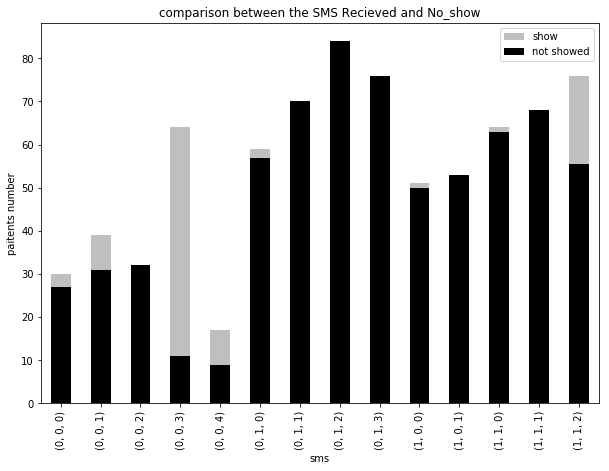

In [35]:
plt.figure(figsize=[10,7])
df_No_show[showed].groupby(["diabetes", 'hypertension','handcap']).median()['age'].plot(kind = "bar",alpha= 0.5, color = "grey",label = "show")
df_No_show[not_showed].groupby(["diabetes", 'hypertension','handcap']).median()['age'].plot(kind = "bar",alpha= 1 ,color = "black",label = "not showed")
plt.title('comparison between the SMS Recieved and No_show')
plt.xlabel('chronic diseases with average age') 
plt.ylabel('the Number of patient')
plt.legend();

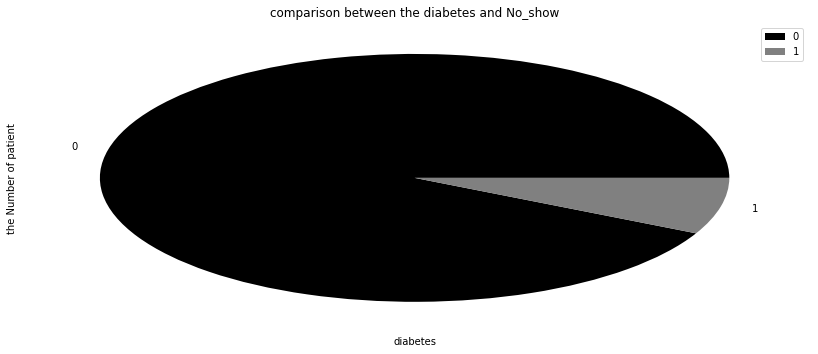

In [44]:
plt.figure(figsize=[14.1 , 5.7]) 
df_No_show.diabetes[showed].value_counts().plot(kind = 'pie', colors= ["black", "grey"] , label = 'showed'  )
plt.title('comparison between the diabetes and No_show') 
plt.xlabel('diabetes') 
plt.ylabel('the Number of patient') 
plt.legend(); 

In [39]:
df_No_show.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

* the clinic recived a few number of patient with handcap
* people who have hypertension and showed are the highest number of chronic diseases 
* we can tell that paitens with Diabetes who showed up is much less than the patient who din't came and have diabetes

## Q4/ is there a relationship between been an alcoholic and showing up at the appointments ?

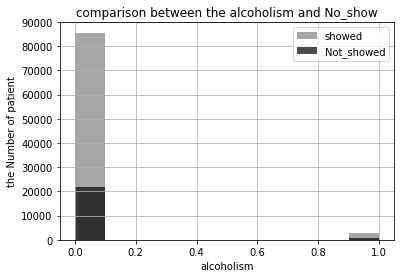

In [37]:
df_No_show.alcoholism[showed].hist(alpha = 0.7 , bins = 10 ,color = 'gray',label = 'showed'  ) 
df_No_show.alcoholism[not_showed].hist(alpha = 0.7 , bins = 10 ,color = "k" , label = 'Not_showed' )
plt.title('comparison between the alcoholism and No_show')
plt.xlabel('alcoholism') 
plt.ylabel('the Number of patient') 
plt.legend();

* alcoholism has no related

## Q5/ Does the scholarship increase the showing up ?

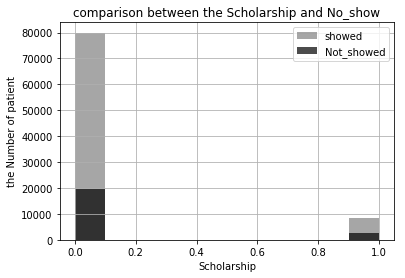

In [45]:
df_No_show.scholarship[showed].hist(alpha = 0.7 , bins = 10 ,color = 'gray',label = 'showed'  ) 
df_No_show.scholarship[not_showed].hist(alpha = 0.7 , bins = 10 ,color = "k" , label = 'Not_showed' )
plt.title('comparison between the Scholarship and No_show') 
plt.xlabel('Scholarship') 
plt.ylabel('the Number of patient') 
plt.legend(); 

* there is no relationship between Scholarship and show and not show

## Q6/ which hospital has a highest amount of paitents and showed up ?

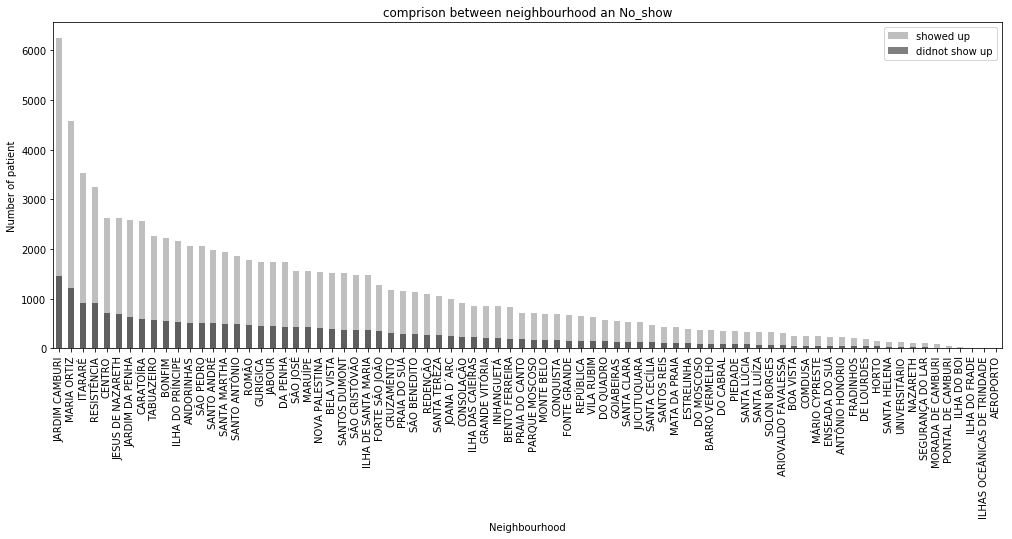

In [51]:
plt.figure(figsize=[17,6])
df_No_show.neighbourhood[showed].value_counts().plot(kind='bar', alpha=0.5, color='grey', label='showed up ')
df_No_show.neighbourhood[not_showed].value_counts().plot(kind='bar', alpha=0.5, color='black', label='didnot show up')
plt.title('comprison between neighbourhood an No_show')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of patient')
plt.legend();

* we saw that the biggest neighbourhood (jardim camburl ) has the higest amount of patients who showed up

<a id='conclusions'></a>
## Conclusions


* we find that most of the paitents who came didn't have cronic diseases
* there is no relationship between the alcoholism and the showing up
* ages after 60 happens to be less showing up than yonger ages
* we can tell that paitents who didn't recive sms showed more than who didn't
* Males pantient is half of the females patients
* the clinic recived a few number of patient with handcap


## limitations

* there was no clear cronic diseases related to showing up and not showing up
* i didn't get identify the main type of Scholarship and how it is related to our showing up 

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0